In [1]:
from model import *
from dilateModel import *
#from model_edge import *
from data import *
from PIL import Image
import cv2

Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packag

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(16,'/data/spacenet/bldg/AllTrain','PAN-PNG','GT-PNG',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('30_Epoch.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=15,callbacks=[model_checkpoint])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/dspuser/unet/model.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)



Epoch 1/15
Found 10586 images belonging to 1 classes.
Found 10586 images belonging to 1 classes.
2000/2000 [==============================] - 1451s 726ms/step - loss: 0.2925 - accuracy: 0.8815

Epoch 00001: loss improved from inf to 0.29252, saving model to 30_Epoch.hdf5
Epoch 2/15
2000/2000 [==============================] - 1475s 737ms/step - loss: 0.1924 - accuracy: 0.9237

Epoch 00002: loss improved from 0.29252 to 0.19241, saving model to 30_Epoch.hdf5
Epoch 3/15
2000/2000 [==============================] - 1473s 736ms/step - loss: 0.1622 - accuracy: 0.9348

Epoch 00003: loss improved from 0.19241 to 0.16217, saving model to 30_Epoch.hdf5
Epoch 4/15
2000/2000 [==============================] - 1476s 738ms/step - loss: 0.1449 - accuracy: 0.9416

Epoch 00004: loss improved from 0.16217 to 0.14484, saving model to 30_Epoch.hdf5
Epoch 5/15
2000/2000 [==============================] - 1478s 739ms/step - loss: 0.1321 - accuracy: 0.9464

Epoch 00005: loss improved from 0.14484 to 0.1321

In [3]:
1451 + 1475 + 1473 + 1476 + 1478 + 1480 +  1526 + 1533 + 1538 + 1532 + 1487 + 1537 + 1542 + 1538 + 1053

22119

In [4]:
(22119/60)/60

6.144166666666666

### Train with npy file

In [3]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

In [ ]:
##Use AllTest


In [3]:
model = unet()
model.load_weights("unet_membrane_AllTrain_8.hdf5")

In [ ]:
#results = model.predict_generator(testGene,30,verbose=1)
#saveResult("data/membrane/test2",results)

### test your model and save predicted results

In [2]:
from PIL import Image
import numpy as np
from skimage import transform

In [36]:
#testGene = testGenerator("/data/spacenet/bldg/AOI_2_Vegas_Test_public/PAN-PNG")
model = unet()
model.load_weights("unet_membrane.hdf5")
np_image = Image.open('/data/spacenet/bldg/AOI_2_Vegas_Test_public/PAN-PNG/PAN_AOI_2_Vegas_img1005.png')
np_image = np.array(np_image).astype('float32')/255
np_image = transform.resize(np_image, (256, 256, 1))
np_image = np.expand_dims(np_image, axis=0)


#model.predict("/data/spacenet/bldg/AOI_2_Vegas_Test_public/PAN-PNG/PAN_AOI_2_Vegas_img1005.png")
#results = model.predict_generator(testGene,30,verbose=1)
#saveResult("data/membrane/test2",results)

In [37]:
im = model.predict(np_image)
#saveResult("data/membrane/test2",im)

In [38]:
np_image1 = Image.open('/data/spacenet/bldg/AOI_2_Vegas_Test_public/PAN-PNG/PAN_AOI_2_Vegas_img1008.png')
np_image1 = np.array(np_image1).astype('float32')/255
np_image1 = transform.resize(np_image1, (256, 256, 1))
np_image1 = np.expand_dims(np_image1, axis=0)

im1 = model.predict(np_image1)

np_image2 = Image.open('/data/spacenet/bldg/AOI_2_Vegas_Test_public/PAN-PNG/PAN_AOI_2_Vegas_img100.png')
np_image2 = np.array(np_image2).astype('float32')/255
np_image2 = transform.resize(np_image2, (256, 256, 1))
np_image2 = np.expand_dims(np_image2, axis=0)

im2 = model.predict(np_image2)
saveResult("data/membrane/test2",im2)

np_image3 = Image.open('/data/spacenet/bldg/AOI_2_Vegas_Test_public/PAN-PNG/PAN_AOI_2_Vegas_img1012.png')
np_image3 = np.array(np_image3).astype('float32')/255
np_image3 = transform.resize(np_image3, (256, 256, 1))
np_image3 = np.expand_dims(np_image3, axis=0)

im3 = model.predict(np_image3)


np_image4 = Image.open('/data/spacenet/bldg/AOI_2_Vegas_Test_public/PAN-PNG/PAN_AOI_2_Vegas_img1013.png')
np_image4 = np.array(np_image4).astype('float32')/255
np_image4 = transform.resize(np_image4, (256, 256, 1))
np_image4 = np.expand_dims(np_image4, axis=0)

im4 = model.predict(np_image4)

im_list = [im, im1, im2, im3, im4]
saveResult("data/membrane/test2",im1)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [42]:
saveResult("data/membrane/test2",im4)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


## Thresholding Results

In [3]:
model = unet()
model.load_weights("Humphries_Bragg_Weights.hdf5")
#model.load_weights('unet_membrane_AllTrain_8.hdf5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/dspuser/unet/model.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [4]:
def predImgGen(imgPath, target_size=(256,256)):
    img = io.imread(imgPath,as_gray = True)
    img = img / 255
    img = trans.resize(img,target_size)
    img = np.reshape(img,img.shape+(1,))
    img = np.reshape(img,(1,)+img.shape)
    return img

In [5]:
def predImgGen2(imgPath, target_size=(256,256)):
    img = io.imread(imgPath,as_gray = True)
    #img = img / 255
    img = trans.resize(img,target_size)
    img = np.reshape(img,img.shape+(1,))
    img = np.reshape(img,(1,)+img.shape)
    return img

In [6]:
maskImg_List = []
test_dir = '/data/spacenet/bldg/AllTest/PAN-PNG'
for i,j,k in os.walk(test_dir):
    for file in k:
        if (os.path.splitext(file)[1] == '.png'):
            PANImgPath = os.path.join(test_dir, file)
            testImg = predImgGen(PANImgPath)
            pred = model.predict(testImg)
        
            predRe = pred.reshape(256,256)
            maskArrThresh = np.zeros((predRe.shape[0], predRe.shape[1], 4)) 
            maskArrThresh[:,:, 0] = 50
            maskArrThresh[:,:, 1] = 255
            maskArrThresh[:,:, 2] = 0
            for row in range(0, predRe.shape[0]):
                for col in range(0, predRe.shape[1]):
                    maskArrThresh[row, col, 3] = 255 - int(predRe[row, col] * 255)
            maskArrThresh = maskArrThresh.astype("uint8")
            maskImg = Image.fromarray(maskArrThresh, 'RGBA')
            #maskImg_List += [maskImg]
            maskImg.save(file)
        
            PANImg = Image.open(PANImgPath)
            PANImgT = PANImg.convert('RGBA')
        
            PANDim = (PANImgT.width, PANImgT.height)
            maskImgRe = maskImg.resize(PANDim) 
        
            comp = Image.alpha_composite(PANImgT, maskImgRe)
            #comp.save(file)

In [9]:
np_image1 = np.array(maskImgRe).astype('float32')/255
np_image1 = transform.resize(np_image1, (256, 256, 1))
np_image1 = np.expand_dims(np_image1, axis=0)

invert1 = cv2.bitwise_not(np_image1)



In [10]:
saveResult("data",invert1)

Lossy conversion from float32 to uint8. Range [-21.848297119140625, -7.974299430847168]. Convert image to uint8 prior to saving to suppress this warning.


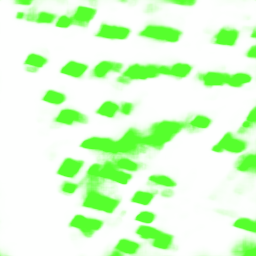

In [7]:
maskImg_List[1]

In [10]:
np_image1 = np.array(maskImg_List[3]).astype('float32')/255
np_image1 = transform.resize(np_image1, (256, 256, 1))
np_image1 = np.expand_dims(np_image1, axis=0)

#saveResult("data",np_image1)

In [11]:
np_image2 = np.array(maskImg_List[1]).astype('float32')/255
np_image2 = transform.resize(np_image2, (256, 256, 1))
np_image2 = np.expand_dims(np_image2, axis=0)

In [13]:
#maskImg
#image = cv2.imread('/data/spacenet/bldg/AllTrain/PAN-PNG/PAN_AOI_2_Vegas_img1002.png')

#image = cv2.imread(im1)
invert1 = cv2.bitwise_not(np_image1)
invert2 = cv2.bitwise_not(np_image2)

invert_list = [invert1, invert2]
saveResult("data",invert_list)


Lossy conversion from float32 to uint8. Range [-12.235958099365234, -11.882962226867676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-12.235958099365234, -10.097213745117188]. Convert image to uint8 prior to saving to suppress this warning.
